In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Switch off future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_excel('tl_words.xlsx')
df.head()

,Unnamed: 0,ability,able,academic,access,act,action,active,activity,actual,...,vital,waste,water,way,ways,whole,wide,work,world,year
0,"Angelins 2019 - Social, Transformative, and Su...",2.236574,1.468906,1.468906,2.039786,0.000000,1.468906,1.468906,0.000000,0.000000,...,0.000000,1.468906,1.794543,2.039786,0.982917,1.468906,0.982917,1.468906,2.039786,0.982917
1,Angelis 2018 - Entwining a Conceptual Framewor...,0.953547,1.432651,0.000000,0.953547,0.000000,1.755215,2.357961,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.830207,1.755215,2.357961,0.000000,0.953547,2.357961,0.000000
2,Ball 1999 - Building a sustainable future.txt,0.000000,0.812322,0.000000,0.000000,1.560121,2.920139,1.254552,1.793846,0.000000,...,0.000000,0.000000,1.254552,2.920139,2.507825,1.560121,0.812322,1.793846,2.920139,1.983160
3,"Bell, Gibson et al. 2016 - Transformational le...",0.000000,1.310050,2.049742,0.855768,0.855768,2.676339,2.049742,0.000000,0.000000,...,0.855768,1.310050,1.310050,2.992954,2.676339,0.855768,0.000000,1.858284,3.510838,1.621276
4,"Benito, Merino 2019 - Competences for sustaina...",1.914028,2.269082,2.737665,0.894081,1.914028,2.984981,1.358454,0.894081,1.674338,...,0.000000,0.000000,0.000000,2.408350,1.914028,1.674338,1.674338,2.827074,2.639470,0.894081


In [3]:
features = df.columns[1:]  
X = df[features].values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Use Ward's method or another appropriate method
linkage_matrix = linkage(scaled_data, method='ward')

In [4]:
results = []

for k in range(2, 11):  # from 2 to 10 clusters
    # Assign cluster labels
    cluster_labels = fcluster(linkage_matrix, k, criterion='maxclust')
    
    # Calculate metrics
    sil_score = silhouette_score(scaled_data, cluster_labels)
    db_score  = davies_bouldin_score(scaled_data, cluster_labels)
    ch_score  = calinski_harabasz_score(scaled_data, cluster_labels)
    
    # Append to results list
    results.append({
        'k': k,
        'silhouette': sil_score,
        'davies_bouldin': db_score,
        'calinski_harabasz': ch_score
    })

# Convert list of dicts to a DataFrame
results_df = pd.DataFrame(results)
results_df

,k,silhouette,davies_bouldin,calinski_harabasz
0,2,0.036828,3.912502,4.002133
1,3,0.026618,4.393258,3.341580
2,4,0.012545,4.045240,2.883160
3,5,0.016270,3.867211,2.658826
4,6,0.019718,3.669012,2.509925
5,7,0.014489,3.506528,2.380685
6,8,0.015926,3.358663,2.277672
7,9,0.019213,3.192652,2.201454
8,10,0.020137,3.032204,2.135278


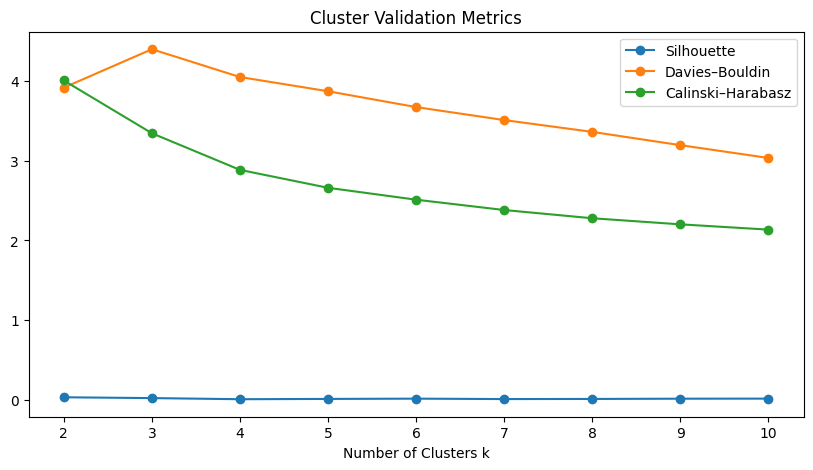

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(results_df['k'], results_df['silhouette'], marker='o', label='Silhouette')
plt.plot(results_df['k'], results_df['davies_bouldin'], marker='o', label='Davies–Bouldin')
plt.plot(results_df['k'], results_df['calinski_harabasz'], marker='o', label='Calinski–Harabasz')
plt.xticks(range(2, 11))
plt.title('Cluster Validation Metrics')
plt.xlabel('Number of Clusters k')
plt.legend()
plt.show()

Based on these results alone, none of the k values stand out as “clear winners” across all three metrics:
* Silhouette Score is highest at k=2, but the absolute value (0.0368) is very low—suggesting that even with 2 clusters, data points are not well separated.
* Davies–Bouldin Index steadily decreases (which is better) as k increases, reaching its minimum at k=10.
* Calinski–Harabasz Index is highest at k=2 and then decreases with higher k.

Explained variance by PC1 and PC2: [0.06122268 0.04650256]


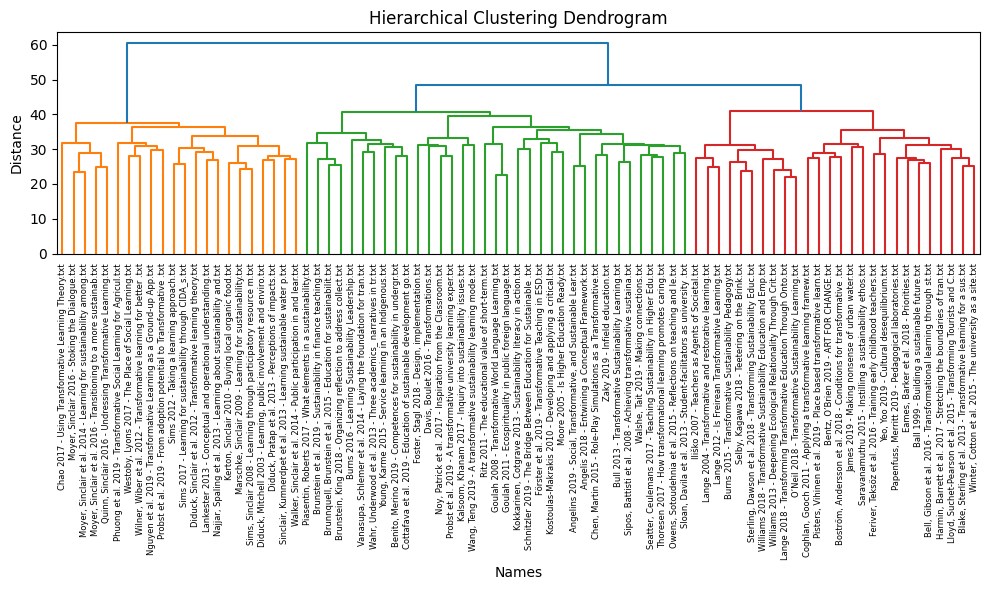

In [6]:
# 3. PCA with 2 components (for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# (Optional) Show how much variance is explained by PC1 and PC2
explained_variance = pca.explained_variance_ratio_
print("Explained variance by PC1 and PC2:", explained_variance)

# 4. Hierarchical Clustering (Ward’s method)
linkage_matrix = linkage(scaled_data, method='ward')

# 5. (Optional) Decide on a cut. 
#    For example, to produce up to 7 clusters, use `t=7` with `criterion='maxclust'`.
cluster_labels = fcluster(linkage_matrix, t=7, criterion='maxclust')

# 6. Plot Dendrogram
plt.figure(figsize=(10, 6))
dendrogram(
    linkage_matrix, 
    labels=df.iloc[:, 0].values,  
    leaf_rotation=90
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Names')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [7]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the 2 PCA components
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Unnamed: 0'] = df.iloc[:, 0].values  # bring back the cookie names
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio by PC1 & PC2:", explained_variance)

Explained variance ratio by PC1 & PC2: [0.06122268 0.04650256]


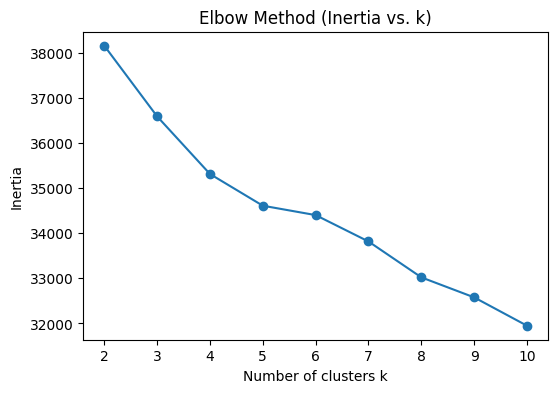

In [8]:
inertias = []
K_values = range(2, 11)  # Try k=2 to k=10

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6,4))
plt.plot(K_values, inertias, marker='o')
plt.title('Elbow Method (Inertia vs. k)')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.show()

In [9]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
final_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels back to your PCA DataFrame
pca_df['Cluster'] = final_labels

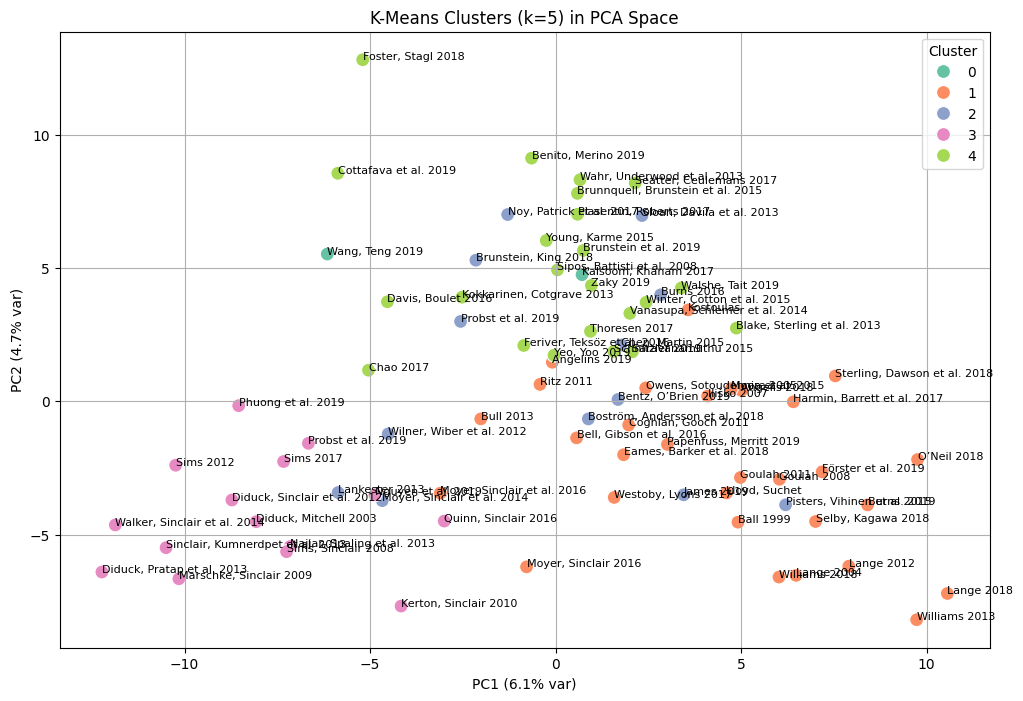

In [13]:
# Create a new column for the shortened names
pca_df['short_name'] = pca_df['Unnamed: 0'].str.split('-', n=1).str[0].str.strip()

plt.figure(figsize=(12,8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    data=pca_df, 
    palette='Set2', 
    s=100
)

# Optionally, label points with cookie names
for i in range(len(pca_df)):
    plt.text(
        pca_df['PC1'][i],
        pca_df['PC2'][i],
        pca_df['short_name'][i],
        fontsize=8
    )

plt.title(f'K-Means Clusters (k={best_k}) in PCA Space')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% var)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% var)')
plt.grid(True)
plt.show()